In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import listoflist

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [7]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Data Analyst - Test Data.xlsx")


In [8]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.3+ KB


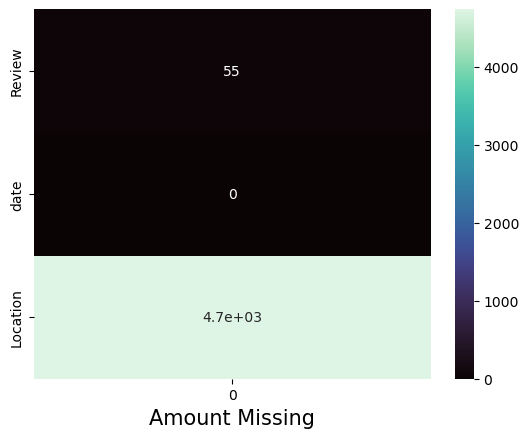

In [10]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('Amount Missing',fontsize=15)
plt.show()

In [11]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [12]:
df = df.iloc[:,0:1]

In [13]:
df.head()

,Review
0,I was very impressed with the resort.\n Great ...
1,The rooms were nice the outside needs work als...
2,Great location! I have stayed at this hotel on...
3,The hotel was adequate for my stay. The strips...
4,"Great location, room was large and spacious. P..."


In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

Review    0
dtype: int64

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.head()

,Review
0,I was very impressed with the resort.\n Great ...
1,The rooms were nice the outside needs work als...
2,Great location! I have stayed at this hotel on...
3,The hotel was adequate for my stay. The strips...
4,"Great location, room was large and spacious. P..."


In [18]:
df.Review[0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [19]:
df['Review'] = df['Review'].str.replace("\n","")

In [20]:
df['Review'] = df['Review'].str.replace("Read more","")

In [21]:
df['Review'] = df['Review'].str.replace("Read less","")

In [22]:
import re
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [23]:
df.Review.head()

0    I was very impressed with the resort Great sta...
1    The rooms were nice the outside needs work als...
2    Great location I have stayed at this hotel on ...
3    The hotel was adequate for my stay The strips ...
4    Great location room was large and spacious Par...
Name: Review, dtype: object

In [24]:
def senti(review):
    if sid.polarity_scores(review)['compound'] >= 0:
        return 'pos'
    else:
        return 'neg'

In [25]:
df['sentiment'] = df['Review'].apply(lambda x: senti(x))

In [26]:
df.head()

,Review,sentiment
0,I was very impressed with the resort Great sta...,pos
1,The rooms were nice the outside needs work als...,pos
2,Great location I have stayed at this hotel on ...,pos
3,The hotel was adequate for my stay The strips ...,pos
4,Great location room was large and spacious Par...,pos


<Axes: xlabel='sentiment', ylabel='count'>

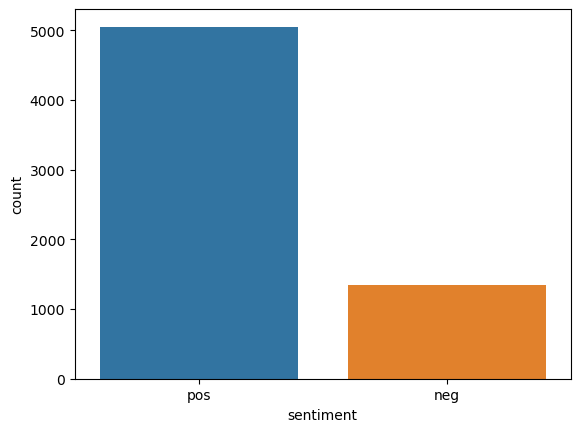

In [27]:
sns.countplot(x='sentiment',data=df)

In [28]:
def pos_tagging(data):
    req_tag = ['NN']
    extracted_words = []
    i = 0
    try:
        for x in data['Review']:
            doc = nlp(x)
            for token in doc:
                i += 1
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    extracted_words.append(token.lemma_)
        return extracted_words
    except Exception as e:
        return extracted_words

In [42]:
extracted_words = pos_tagging(df)

In [30]:
ser = pd.Series(extracted_words).value_counts().head(10)
index = ser.index
value = ser.values

C:\Users\USER\AppData\Local\Temp\ipykernel_8352\3457726669.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series(extracted_words).value_counts().head(10)


In [31]:
index

Float64Index([], dtype='float64')

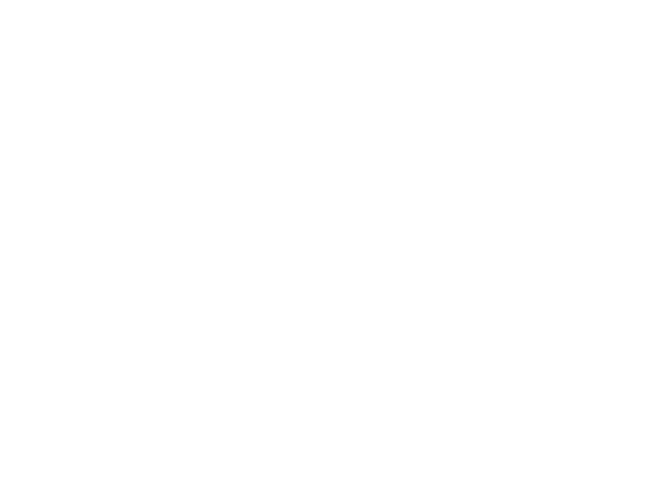

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
freq = index
val = value
ax.pie(val, labels = freq,autopct='%1.2f%%')
plt.show()


In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [34]:
aspect = []
description = []

for sentence in df['Review']:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspect.append(target)
    description.append(descriptive_term)

In [35]:
df['aspect'] = aspect
df['description'] = description

In [36]:
df.head()

,Review,sentiment,aspect,description
0,I was very impressed with the resort Great sta...,pos,,very reasonable
1,The rooms were nice the outside needs work als...,pos,rooms,nice
2,Great location I have stayed at this hotel on ...,pos,,last
3,The hotel was adequate for my stay The strips ...,pos,strips,andor
4,Great location room was large and spacious Par...,pos,Parking,friendly


In [37]:
df['aspect'] = df['aspect'].str.replace('beds','bed')
df['aspect'] = df['aspect'].str.replace('rooms','room')

In [38]:
df['aspect'].value_counts().head(10)

            1989
room         517
staff        318
hotel        293
location     182
bed          107
service       66
place         63
property      58
area          54
Name: aspect, dtype: int64

In [39]:
new = df[(df['aspect'] == 'room') | (df['aspect'] == 'staff') | (df['aspect'] == 'hotel') |(df['aspect'] == 'location') | (df['aspect'] == 'bed') |(df['aspect'] == 'service')][['sentiment','aspect']]

<Axes: xlabel='aspect', ylabel='count'>

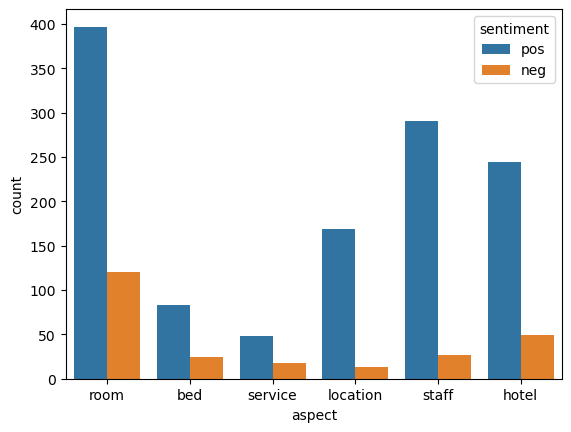

In [40]:
sns.countplot(x='aspect',data=new, hue='sentiment')

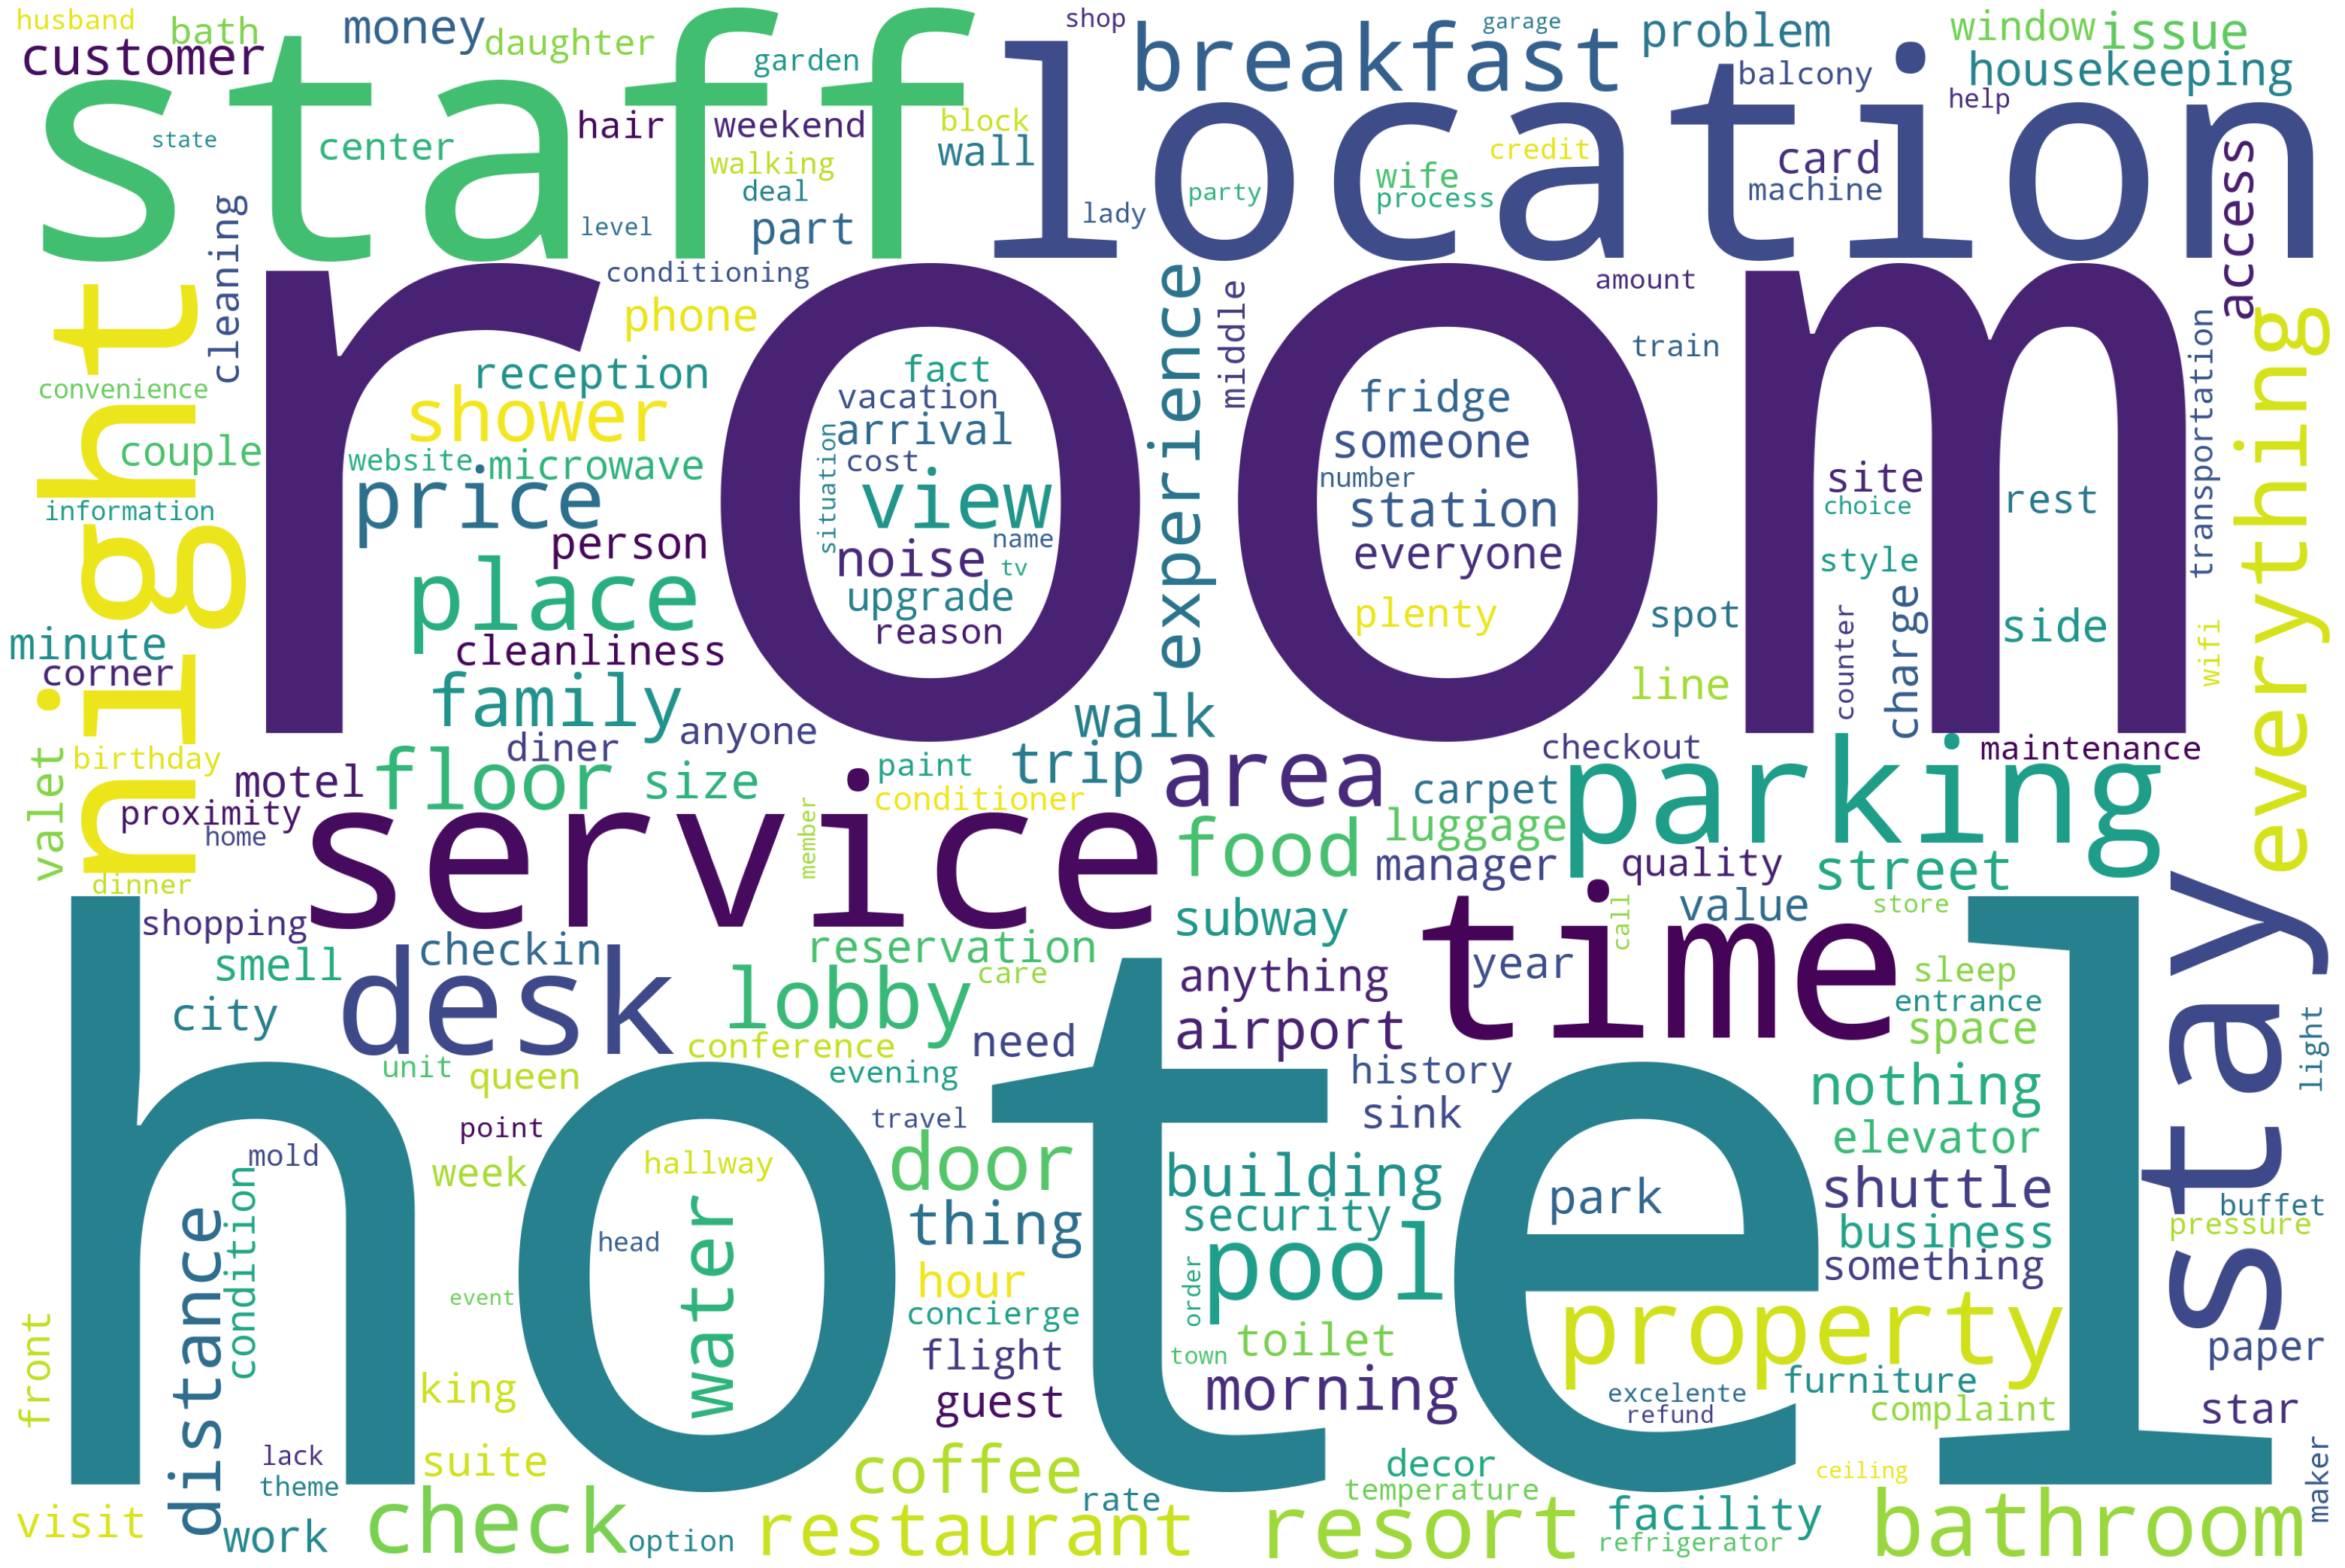

In [44]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
unique_string=(" ").join(extracted_words)   
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',random_state=1, collocations=False, stopwords = STOPWORDS).generate(unique_string)

plot_cloud(wordcloud)

In [45]:
from geopy.geocoders import Nominatim

In [46]:
df2= pd.read_excel(r"C:\Users\USER\Desktop\Data Analyst - Test Data.xlsx")


In [47]:
df2.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [48]:
df2 = df2.iloc[:,:-1]

In [49]:
df2 = df2.dropna()

In [50]:
df2.isna().sum()

Review    0
date      0
dtype: int64

In [51]:
len(df2)

6393

In [52]:
geolocator = Nominatim(user_agent = "geoapiExcercises")
def country(names):
    c = []
    for name in names:
        location = geolocator.geocode(name)
        country = str(location).split(",")[-1]
        c.append(country.strip())
    return c
    

In [53]:
df2['sentiment'] = df2['Review'].apply(lambda x: senti(x))

In [54]:
df2.head()

,Review,date,sentiment
0,I was very impressed with the resort.\n Great ...,2019-08-20,pos
1,The rooms were nice the outside needs work als...,2019-08-20,pos
2,Great location! I have stayed at this hotel on...,2019-08-20,pos
3,The hotel was adequate for my stay. The strips...,2019-08-20,pos
4,"Great location, room was large and spacious. P...",2019-08-19,pos
